In [1]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.cross_validation import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

/home/maviator/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# get titanic & test csv files as a DataFrame
train = pd.read_csv("../Data/train.csv")
test    = pd.read_csv("../Data/test.csv")
print train.shape, test.shape

(891, 12) (418, 11)


In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check for missing data

In [5]:

#Checking for missing data
NAs = pd.concat([train.isnull().sum(), test.isnull().sum()], axis=1, keys=['Train', 'Test'])
NAs[NAs.sum(axis=1) > 0]

,Train,Test
Age,177,86.0
Cabin,687,327.0
Embarked,2,0.0
Fare,0,1.0


## Combining Train and Test data to fill missing values

In [6]:
# Spliting to features and lables
#train_labels = train.pop('Survived')

features = pd.concat([train, test], keys=['train', 'test'])
features.shape

(1309, 12)

## Removing features

In [7]:
# At this point we will drop the Cabin feature since it is missing a lot of the data
features.pop('Cabin')
train.pop('Cabin')
test.pop('Cabin')

# At this point names don't affect our model so we drop it
#features.pop('Name')

# At this point we drop Ticket feature
features.pop('Ticket')
train.pop('Ticket')
test.pop('Ticket')

features.shape, train.shape, test.shape

((1309, 10), (891, 10), (418, 9))

## Ticket feature engineering

In [8]:
#features["Ticket"].head()

In [9]:
# Treat Ticket by extracting the ticket prefix. When there is no prefix it returns X. 
'''
Ticket = []
for i in list(features.Ticket):
    if not i.isdigit() :
        Ticket.append(i.replace(".","").replace("/","").strip().split(' ')[0]) #Take prefix
    else:
        Ticket.append("X")
        
features["Ticket"] = Ticket
features["Ticket"].head()
'''

'\nTicket = []\nfor i in list(features.Ticket):\n    if not i.isdigit() :\n        Ticket.append(i.replace(".","").replace("/","").strip().split(\' \')[0]) #Take prefix\n    else:\n        Ticket.append("X")\n        \nfeatures["Ticket"] = Ticket\nfeatures["Ticket"].head()\n'

## Cabin Feature extraction

In [10]:
# Replace the Cabin number by the type of cabin 'X' if not
#features['Cabin'] = [i[0] if not pd.isnull(i) else 'X' for i in features['Cabin']]

In [11]:
#g = sns.countplot(features['Cabin'],order=['A','B','C','D','E','F','G','T','X'])

## Name/Title extraction

In [12]:
features['Name'].head()
i = features['Name'][0]
i.split(',')[1].split('.')[0].strip()

'Mr'

In [13]:
# Get Title from Name
dataset_title = [i.split(',')[1].split('.')[0].strip() for i in train['Name']]
train['Title'] = dataset_title
train['Title'].head()

dataset_title = [i.split(',')[1].split('.')[0].strip() for i in test['Name']]
test['Title'] = dataset_title
test['Title'].head()

0     Mr
1    Mrs
2     Mr
3     Mr
4    Mrs
Name: Title, dtype: object

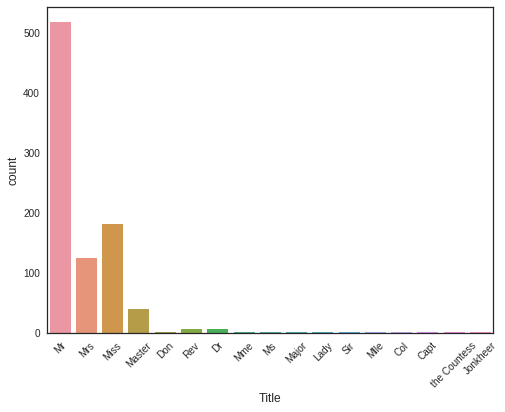

In [14]:
g = sns.countplot(x="Title",data=train)
g = plt.setp(g.get_xticklabels(), rotation=45) 

In [15]:
# Convert to categorical values Title
train["Title"] = train["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train["Title"] = train["Title"].map({"Master":'0', "Miss":'1', "Ms":'1', "Mme":'1', "Mlle":'1', "Mrs":'1', "Mr":'2', "Rare":'3'})
#features["Title"] = features["Title"].astype(int)

test["Title"] = test["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
test["Title"] = test["Title"].map({"Master":'0', "Miss":'1', "Ms":'1', "Mme":'1', "Mlle":'1', "Mrs":'1', "Mr":'2', "Rare":'3'})


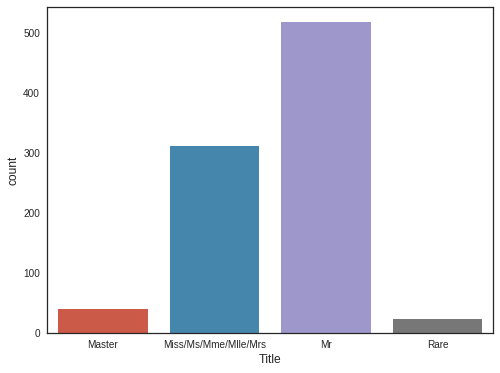

In [16]:
g = sns.countplot(train["Title"])
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

Let's add mean target encoding to Title variable

In [17]:
means = train.groupby('Title').Survived.mean()

In [18]:
train['Title_mean_target'] = train['Title'].map(means)
test['Title_mean_target'] = test['Title'].map(means)

In [19]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_mean_target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0.156673
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,0.739550
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,0.739550
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,0.739550
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2,0.156673


In [20]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_mean_target
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,2,0.156673
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,1,0.739550
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,2,0.156673
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,2,0.156673
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,1,0.739550


In [21]:
train.pop('Name')
test.pop('Name')
train.shape, test.shape

((891, 11), (418, 10))

## Filling missing values

In [22]:
# Filling missing Age values with mean
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

# Filling missing Embarked values with most common value
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

# Filling missing Fare values with mean
train['Fare'] = train['Fare'].fillna(train['Fare'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

## Log transformation for Fare to reduce skewness

In [23]:
# Apply log to Fare to reduce skewness distribution
train["Fare"] = train["Fare"].map(lambda i: np.log(i) if i > 0 else 0)
test["Fare"] = test["Fare"].map(lambda i: np.log(i) if i > 0 else 0)

## Converting Sex to binary feature

In [24]:
def cat2num(x):
    if x == 'male':
        return 1
    else:
        return 0

In [25]:
features['Sex'] = features['Sex'].apply(cat2num)

## Converting PClass to categorical

Let's apply mean target encoding for PClass

In [26]:
means = train.groupby('Pclass').Survived.mean()

In [27]:
train['PClass_mean_target'] = train['Pclass'].map(means)
test['PClass_mean_target'] = test['Pclass'].map(means)

In [28]:
def num2cat(x):
    return str(x)

In [29]:
train['Pclass_num'] = train['Pclass'].apply(num2cat)
test['Pclass_num'] = test['Pclass'].apply(num2cat)
train.pop('Pclass')
test.pop('Pclass')

train.shape, test.shape

((891, 12), (418, 11))

In [30]:
train.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Title_mean_target,PClass_mean_target,Pclass_num
0,1,0,male,22.0,1,0,1.981001,S,2,0.156673,0.242363,3
1,2,1,female,38.0,1,0,4.266662,C,1,0.739550,0.629630,1
2,3,1,female,26.0,0,0,2.070022,S,1,0.739550,0.242363,3
3,4,1,female,35.0,1,0,3.972177,S,1,0.739550,0.629630,1
4,5,0,male,35.0,0,0,2.085672,S,2,0.156673,0.242363,3


## combining SibSP and Parch into new feature

In [31]:
train['Family'] = train['SibSp'] + train['Parch'] + 1
test['Family'] = test['SibSp'] + test['Parch'] + 1

train.pop('SibSp')
test.pop('SibSp')

train.pop('Parch')
test.pop('Parch')

train.shape, test.shape

((891, 11), (418, 10))

Let's try mean target encoding for Embarked

In [33]:
means = train.groupby('Embarked').Survived.mean()

In [34]:
train['Embarked_mean_target'] = train['Embarked'].map(means)
test['Embarked_mean_target'] = test['Embarked'].map(means)

In [35]:
train.head()

,PassengerId,Survived,Sex,Age,Fare,Embarked,Title,Title_mean_target,PClass_mean_target,Pclass_num,Family,Embarked_mean_target
0,1,0,male,22.0,1.981001,S,2,0.156673,0.242363,3,2,0.339009
1,2,1,female,38.0,4.266662,C,1,0.739550,0.629630,1,2,0.553571
2,3,1,female,26.0,2.070022,S,1,0.739550,0.242363,3,1,0.339009
3,4,1,female,35.0,3.972177,S,1,0.739550,0.629630,1,2,0.339009
4,5,0,male,35.0,2.085672,S,2,0.156673,0.242363,3,1,0.339009


## Converting categorical features to binary

In [36]:
# Getting Dummies from all other categorical vars
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)
    
for col in test.dtypes[test.dtypes == 'object'].index:
    for_dummy = test.pop(col)
    test = pd.concat([test, pd.get_dummies(for_dummy, prefix=col)], axis=1)    

In [37]:
train.shape, test.shape

((891, 20), (418, 19))

In [38]:
train.head()

,PassengerId,Survived,Age,Fare,Title_mean_target,PClass_mean_target,Family,Embarked_mean_target,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_0,Title_1,Title_2,Title_3,Pclass_num_1,Pclass_num_2,Pclass_num_3
0,1,0,22.0,1.981001,0.156673,0.242363,2,0.339009,0,1,0,0,1,0,0,1,0,0,0,1
1,2,1,38.0,4.266662,0.739550,0.629630,2,0.553571,1,0,1,0,0,0,1,0,0,1,0,0
2,3,1,26.0,2.070022,0.739550,0.242363,1,0.339009,1,0,0,0,1,0,1,0,0,0,0,1
3,4,1,35.0,3.972177,0.739550,0.629630,2,0.339009,1,0,0,0,1,0,1,0,0,1,0,0
4,5,0,35.0,2.085672,0.156673,0.242363,1,0.339009,0,1,0,0,1,0,0,1,0,0,0,1


## Splitting train and test data

In [39]:
train_labels = train.pop('Survived')

In [40]:
train.shape, test.shape

((891, 19), (418, 19))

## Modelling

## Hyperparameter tuning

### 1. Adaboost

In [42]:
## META MODELING  WITH ADABOOST, RF, EXTRATREES and GRADIENTBOOSTING

# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC, param_grid = ada_param_grid, cv=5,
                        scoring="accuracy", n_jobs= -1, verbose = 1)

gsadaDTC.fit(train, train_labels)

ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 5 folds for each of 112 candidates, totalling 560 fits


[Parallel(n_jobs=-1)]: Done 212 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 560 out of 560 | elapsed:    4.6s finished


0.77665544332211001

### 2. ExtraTrees

In [43]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=5,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsExtC.fit(train, train_labels)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.5min finished


0.83052749719416386

### 3. Random Forest Classifier

In [44]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gsRFC.fit(train, train_labels)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   26.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:  2.9min finished


0.83052749719416386

### 4. Gradient Boosting Classifier

In [45]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

gsGBC.fit(train, train_labels)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   21.0s finished


0.83501683501683499

### 5. SVC Classifier

In [46]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=5,
                      scoring="accuracy", n_jobs= -1, verbose = 1)

gsSVMC.fit(train, train_labels)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:   26.0s finished


0.61616161616161613

## 6. CatBoost

In [47]:
# CatBoost tunning

CB = CatBoostClassifier()
cb_param_grid = {'loss_function' : ["Logloss"],
              'iterations' : [100,200,300, 500],
              'learning_rate': [0.1, 0.05, 0.01],
              'depth': [4, 8] 
              }

CBBC = GridSearchCV(CB,param_grid = cb_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 0)

CBBC.fit(train, train_labels)

CB_best = CBBC.best_estimator_

# Best score
CBBC.best_score_

0: learn: 0.6358661	total: 116ms	remaining: 11.4s
0: learn: 0.634738	total: 153ms	remaining: 15.1s
0: learn: 0.6278296	total: 162ms	remaining: 16.1s
0: learn: 0.6453176	total: 134ms	remaining: 13.3s
1: learn: 0.589555	total: 198ms	remaining: 9.69s
1: learn: 0.5834367	total: 232ms	remaining: 11.4s
1: learn: 0.5817577	total: 261ms	remaining: 12.8s
1: learn: 0.6103904	total: 218ms	remaining: 10.7s
2: learn: 0.5517916	total: 279ms	remaining: 9.01s
2: learn: 0.5494957	total: 313ms	remaining: 10.1s
2: learn: 0.5407119	total: 363ms	remaining: 11.7s
2: learn: 0.5717135	total: 318ms	remaining: 10.3s
3: learn: 0.5294667	total: 419ms	remaining: 10.1s
3: learn: 0.5196334	total: 405ms	remaining: 9.72s
3: learn: 0.5145369	total: 436ms	remaining: 10.5s
3: learn: 0.5404179	total: 373ms	remaining: 8.95s
4: learn: 0.5071107	total: 507ms	remaining: 9.63s
4: learn: 0.4929693	total: 538ms	remaining: 10.2s
4: learn: 0.5127674	total: 467ms	remaining: 8.87s
4: learn: 0.4957111	total: 526ms	remaining: 10s
5: l

0.83277216610549942

## 7. Xgboost

In [48]:
# Gradient boosting tunning

XBC = XGBClassifier()
xb_param_grid = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8]
              }

xGBC = GridSearchCV(XBC,param_grid = xb_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

xGBC.fit(train, train_labels)

xBC_best = xGBC.best_estimator_

# Best score
xGBC.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   53.2s finished


0.81818181818181823

## 8. Lightgbm

In [49]:
# Gradient boosting tunning

LBC = LGBMClassifier()
lb_param_grid = {
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8]
              }

lGBC = GridSearchCV(LBC,param_grid = lb_param_grid, cv=5,
                     scoring="accuracy", n_jobs= -1, verbose = 1)

lGBC.fit(train, train_labels)

lBC_best = lGBC.best_estimator_

# Best score
lGBC.best_score_

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.0min finished


0.83277216610549942

## Train Final models

## Model Stacking

In [54]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best),('gbs',GBC_best),
                                       ('lgb', lBC_best),('cbs',CB_best),
                                       ('Ext', ExtC_best)],
                           n_jobs=-1)

votingC = votingC.fit(train, train_labels)

0: learn: 0.6862788	total: 93.2ms	remaining: 27.9s
1: learn: 0.6799385	total: 159ms	remaining: 23.6s
2: learn: 0.6761125	total: 208ms	remaining: 20.6s
3: learn: 0.67085	total: 265ms	remaining: 19.6s
4: learn: 0.6662744	total: 326ms	remaining: 19.2s
5: learn: 0.6613652	total: 381ms	remaining: 18.7s
6: learn: 0.6558686	total: 434ms	remaining: 18.2s
7: learn: 0.6498093	total: 495ms	remaining: 18.1s
8: learn: 0.6444906	total: 551ms	remaining: 17.8s
9: learn: 0.638616	total: 598ms	remaining: 17.3s
10: learn: 0.6331169	total: 643ms	remaining: 16.9s
11: learn: 0.6283864	total: 687ms	remaining: 16.5s
12: learn: 0.623443	total: 753ms	remaining: 16.6s
13: learn: 0.6192341	total: 812ms	remaining: 16.6s
14: learn: 0.6149812	total: 864ms	remaining: 16.4s
15: learn: 0.6100408	total: 918ms	remaining: 16.3s
16: learn: 0.6061559	total: 978ms	remaining: 16.3s
17: learn: 0.6023222	total: 1.03s	remaining: 16.2s
18: learn: 0.5977308	total: 1.09s	remaining: 16.2s
19: learn: 0.5931821	total: 1.15s	remaining:

## Prediction

In [55]:
test_y = votingC.predict(test)

## Submission

In [56]:
test_id = test.PassengerId
test_submit = pd.DataFrame({'PassengerId': test_id, 'Survived': test_y})
test_submit.shape
test_submit.head()
test_submit.to_csv('titanic_voting_mean_encoding.csv', index=False)

## History

- RF base model score: 0.76076
- GBR base model score: 0.71770
- SVC base model score: 0.60287
- Voting classifier with RF, GBR, SVC. Score: 0.73684
- Voting classifier with hyperparameter tuned model (RF, GB, SVC, ExT, Ada). Score: 0.77990
- Added feature engineering to extract Title from Name. Score: 0.78947
- Added feature engineering for cabin did not improve score
- Separated train and test transformations, added mean target encoding for PClass, Title and Embarked, used Extrees, LightGBM, RF, CatBoost and GBM. Score: 0.79425